<a href="https://colab.research.google.com/github/arnavm30/skateboard_deck_generation/blob/main/StyleGAN2_ADA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# StyleGAN2-ADA

StyleGAN2-ADA only works with Tensorflow 1. 

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


Shows the assigned GPU

In [ ]:
!nvidia-smi

Wed Jun  2 21:58:53 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Setting up Drive

Mount Drive to the Colab notebook so that the StyleGAN2-ADA repo can be downloaded into a Drive folder.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


If repo already installed, skip the installation process and cd into the repo. If not installed, install it.

In [ ]:
import os
if os.path.isdir('/content/drive/My Drive/StyleGAN2-ADA_colab'):
    %cd '/content/drive/My Drive/StyleGAN2-ADA_colab/stylegan2-ada'
else:
    %cd '/content/drive/My Drive/'
    !mkdir StyleGAN2-ADA_colab
    %cd StyleGAN2-ADA_colab
    !git clone https://github.com/NVlabs/stylegan2-ada
    %cd stylegan2-ada
    !mkdir datasets

/content/drive/My Drive/StyleGAN2-ADA_colab/stylegan2-ada


# Preparing Dataset

*This section only needs to be run the first time training to download the dataset into Drive*

Unzipping zipped dataset uploaded directly to colab and converting it to a TFRecord, which is the format StyleGAN2-ADA uses.

In [ ]:
zip_path = '/content/decks.zip'
outdir = '/content/'
!unzip {zip_path} -d {outdir}

Archive:  /content/decks.zip
   creating: /content/decks/
  inflating: /content/decks/ccs_5.png  
  inflating: /content/decks/sw_17.png  
  inflating: /content/decks/sw_19.png  
  inflating: /content/decks/sw_20.png  
  inflating: /content/decks/sw_22.png  
  inflating: /content/decks/sw_28.png  
  inflating: /content/decks/sw_31.png  
  inflating: /content/decks/sw_34.png  
  inflating: /content/decks/sw_37.png  
  inflating: /content/decks/ccs_9.png  
  inflating: /content/decks/tgms_3.png  
  inflating: /content/decks/tgms_7.png  
  inflating: /content/decks/tgms_9.png  
  inflating: /content/decks/tgms_14.png  
  inflating: /content/decks/tgms_15.png  
  inflating: /content/decks/tgms_19.png  
  inflating: /content/decks/tgms_24.png  
  inflating: /content/decks/tgms_44.png  
  inflating: /content/decks/tgms_52.png  
  inflating: /content/decks/tgms_56.png  
  inflating: /content/decks/tgms_60.png  
  inflating: /content/decks/tgms_61.png  
  inflating: /content/decks/tgms_63.png  

In [ ]:
dataset = './datasets/decks'
dataset_path = '/content/decks'

!python dataset_tool.py create_from_images {dataset} {dataset_path}

Loading images from "/content/decks"
Error: No input images found


# Training Model

Setting arguments and training model.

In [ ]:
# for first time training, set to 'ffhq512' for transfer learning so that convergence is faster
# after, set to path of latest .pkl file to resume where previous training left off
resume_from = '/content/drive/MyDrive/StyleGAN2-ADA_colab/stylegan2-ada/results/00007-decks-mirror-auto1-bg-resumecustom/network-snapshot-000240.pkl'

dataset = './datasets/decks'

# augmentations: (b)lit, (g)eom
augs = 'bg'

# images mirrored left to right
mirrored = True 

# model generate samples and a .pkl file with model weights every 4 ticks
snapshot_count = 4 

# no metrics since quality of output is kind of subjective and running metrics adds a lot of time
metrics = None 

outdir = './results'

# training
!python train.py  --resume {resume_from} --data {dataset} --augpipe {augs} --mirror {mirrored} --snap {snapshot_count} --metrics {metrics} --outdir {outdir}

tcmalloc: large alloc 4294967296 bytes == 0x559daf64e000 @  0x7f17f3e4d001 0x7f17f105054f 0x7f17f10a0b58 0x7f17f10a4b17 0x7f17f1143203 0x559da7c45d54 0x559da7c45a50 0x559da7cba105 0x559da7cb47ad 0x559da7c47c9f 0x559da7c88d79 0x559da7c85cc4 0x559da7c46559 0x559da7cba4f8 0x559da7cb44ae 0x559da7b86e2c 0x559da7cb6bb5 0x559da7cb44ae 0x559da7b86e2c 0x559da7cb6bb5 0x559da7cb47ad 0x559da7b86e2c 0x559da7cb6bb5 0x559da7c4730a 0x559da7cb53b5 0x559da7cb44ae 0x559da7cb41b3 0x559da7d7e182 0x559da7d7e4fd 0x559da7d7e3a6 0x559da7d55723
tcmalloc: large alloc 4294967296 bytes == 0x559eaf64e000 @  0x7f17f3e4b1e7 0x7f17f105046e 0x7f17f10a0c7b 0x7f17f10a135f 0x7f17f1143103 0x559da7c45d54 0x559da7c45a50 0x559da7cba105 0x559da7cb44ae 0x559da7c473ea 0x559da7cb632a 0x559da7cb44ae 0x559da7c473ea 0x559da7cb632a 0x559da7cb44ae 0x559da7c473ea 0x559da7cb632a 0x559da7c4730a 0x559da7cb53b5 0x559da7cb44ae 0x559da7c473ea 0x559da7cb97f0 0x559da7cb44ae 0x559da7c473ea 0x559da7cb632a 0x559da7cb47ad 0x559da7c47c9f 0x559da7c8

# Testing Model

Downloading model from Drive

In [ ]:
id = '117ZORa1dPkpkMxVKhugPmcioXFKL4zFx' #google id of saved model in .pkl format
outdir = '/content/network.pkl'
!gdown --id {id} -O {outdir}

Downloading...
From: https://drive.google.com/uc?id=117ZORa1dPkpkMxVKhugPmcioXFKL4zFx
To: /content/network.pkl
364MB [00:01, 218MB/s]


opensimplex is needed for programs used to test the model

In [ ]:
!pip install opensimplex

 ### Generating Images

`--seeds` chooses random seeds from the model; each seed generates one random array

In [ ]:
network = '/content/network.pkl'
seeds='1-40'
outdir = '/content/drive/MyDrive/StyleGAN2-ADA_colab/stylegan2-ada//testing/generate'

!python generate.py generate-images --network {network} --seeds {seeds} --outdir {outdir}

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)3399680/45929032 bytes (7.4%)7528448/45929032 bytes (16.4%)11673600/45929032 bytes (25.4%)15867904/45929032 bytes (34.5%)20267008/45929032 bytes (44.1%)24453120/45929032 bytes (53.2%)28581888/45929032 bytes (62.2%)32759808/45929032 bytes (71.3%)36921344/45929032 bytes (80.4%)41156608/45929032 bytes (89.6%)45555712/45929032 bytes (99.2%)45929032/45929032 bytes (100.0%)
  Done
File saved as /root

### Interpolation
generating small changes to a vector to make it appear animated between each frame

`--walk-type`: type of interpolation (line or noise loop) and latent space (z space or w space)

`--frames`: amount of frames to make

`--trunc`: number that relates to level of realisticness of the the ouptut. 0.0-1.0 produce realistic results

###### Line interpolation
linear path from one seed to another in w or z space.

In [ ]:
network = '/content/network.pkl'
seeds = '13,19,94,133,67,22,13'
walk = 'line-w'
outdir = '/content/drive/MyDrive/StyleGAN2-ADA_colab/stylegan2-ada//testing/line-w'

!python generate.py generate-latent-walk --network {network} --walk-type {walk} --seeds {seeds} --outdir {outdir}

Loading networks from "/content/network.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Loading... Done.
Generating image for step 0/246 ...
Generating image for step 1/246 ...
Generating image for step 2/246 ...
Generating image for step 3/246 ...
Generating image for step 4/246 ...
Generating image for step 5/246 ...
Generating image for step 6/246 ...
Generating image for step 7/246 ...
Generating image for step 8/246 ...
Generating image for step 9/246 ...
Generating image for step 10/246 ...
Generating image for step 11/246 ...
Generating image for step 12/246 ...
Generating image for step 13/246 ...
Generating image for step 14/246 ...
Generating image for step 15/246 ...
Generating image for step 16/246 ...
Generating image for step 17/246 ...
Generating image for step 18/246 ...
Generating image for step 19/246 ...
Generating image for step 20/246 ...
Generating image for step 21/246 ...
Generating image f

###### Noise loop interpolation
random path through z space

`--diameter`: number that controls the radius of the loop (small means less diverse sample, large means more diverse)

`--start_seed`: starting place in z space

In [ ]:
network = '/content/network.pkl'
walk = 'noiseloop'
diameter = '1.5'
start_seed = '0'
outdir = '/content/drive/MyDrive/StyleGAN2-ADA_colab/stylegan2-ada/testing/noiseloop'

!python generate.py generate-latent-walk --network {network} --walk-type {walk} --start_seed {start_seed} --diameter {diameter} --outdir {outdir}

Loading networks from "/content/network.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Loading... Done.
Generating image for step 0/240 ...
Generating image for step 1/240 ...
Generating image for step 2/240 ...
Generating image for step 3/240 ...
Generating image for step 4/240 ...
Generating image for step 5/240 ...
Generating image for step 6/240 ...
Generating image for step 7/240 ...
Generating image for step 8/240 ...
Generating image for step 9/240 ...
Generating image for step 10/240 ...
Generating image for step 11/240 ...
Generating image for step 12/240 ...
Generating image for step 13/240 ...
Generating image for step 14/240 ...
Generating image for step 15/240 ...
Generating image for step 16/240 ...
Generating image for step 17/240 ...
Generating image for step 18/240 ...
Generating image for step 19/240 ...
Generating image for step 20/240 ...
Generating image for step 21/240 ...
Generating image f

### Projection
taking an image outside the model and finding the closest representation generated by the model. 


In [ ]:
%cd /content/drive/My Drive/StyleGAN2-ADA_colab/stylegan2-ada/
network = '/content/network.pkl'
target = '/content/ccs_40.png'
outdir = '/content/drive/MyDrive/StyleGAN2-ADA_colab/stylegan2-ada/testing/projection'

!python projector.py  --network {network} --target {target} --outdir {outdir}

/content/drive/My Drive/StyleGAN2-ADA_colab/stylegan2-ada
Loading networks from "/content/network.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Loading... Done.
Projector: Computing W midpoint and stddev using 10000 samples...
Projector: std = 5.65807
Projector: Setting up noise inputs...
Projector: Building image output graph...
Projector: Building loss graph...
Projector: Building noise regularization graph...
Projector: Setting up optimizer...
Projector: Preparing target images...
Projector: Initializing optimization state...
100% 1000/1000 [02:55<00:00,  5.71it/s, dist=0.0928, loss=0.09]


# Displaying Results

This cell is used to display images generated from running tests

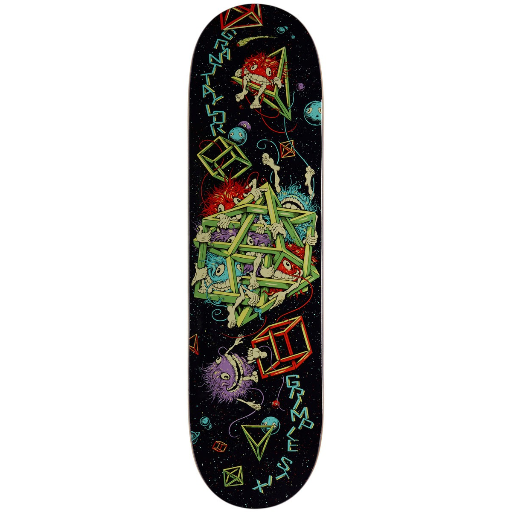

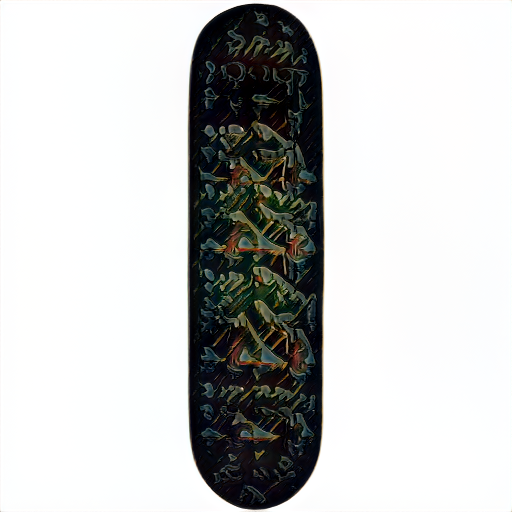

In [ ]:
from IPython.display import Image, display
import glob, os
images = '/content/drive/MyDrive/StyleGAN2-ADA_colab/stylegan2-ada/testing/projection'
os.chdir(images)
for image_name in glob.glob('*.png'):
  display(Image(filename=image_name, width=512))